In [43]:
import os
import pickle

In [44]:
RESULTS_FOLDER = "results"
models = os.listdir(RESULTS_FOLDER)

res = {}
for model in models:
    with open(os.path.join(RESULTS_FOLDER, model, "shifts_results.pkl"), "rb") as f:
        res[model] = pickle.load(f)

res

{'openl3': {'Human/Cough': {'n_2020': 0, 'n_2021': 8, 'n_granollers': 14},
  'Human/Movement': {'n_2020': 106,
   'n_2021': 41,
   'n_granollers': 0,
   '2021': {'p_values': [0.5516379691937094,
     0.19012883330720165,
     0.0006077189966323417,
     6.653217741313671e-07,
     0.06575997220945266,
     2.2665190882656323e-08,
     0.0090100098228363,
     2.9857758677800065e-06,
     0.00024317867203804173,
     0.00955752144319591,
     0.019241463486481036,
     0.0003663752605202271,
     0.5663203303940229,
     0.3563661429707395,
     0.5663203303940229,
     0.08052582430210142,
     0.49404893262549227,
     0.0266886491052247,
     0.0002219468324305865,
     0.02951313548846364,
     0.7523679344705079,
     0.08831410429422595,
     4.033100888374067e-08,
     0.0023257358519824536,
     0.000526991204367524,
     0.02598005461651435,
     0.004709605747020931,
     0.00404097421990214,
     0.0006525265793921104,
     0.004563736219042109,
     3.740008634905501e-05,
  

In [45]:
res.keys()

dict_keys(['openl3', 'wav2vec', 'yamnet'])

In [46]:
res["openl3"].keys()

dict_keys(['Human/Cough', 'Human/Movement', 'Human/Movement/Steps', 'Human/Music', 'Human/Voice', 'Industrial/Construction', 'Industrial/Industry', 'Industrial/Vacuum', 'Industrial/Ventilation', 'Nature/Animals/Bird', 'Nature/Animals/Cat', 'Nature/Animals/Dog', 'Nature/Elements/Water', 'Nature/Elements/Wind', 'Nature/Vegetation', 'Signals', 'Signals/Alarm', 'Signals/Bells', 'Signals/Klaxon', 'Signals/Siren', 'Things/Blind', 'Things/Door', 'Things/Movement', 'Things/Trolley', 'Transport/Motorized', 'Transport/Motorized/Air', 'Transport/Motorized/Rail', 'Transport/Motorized/Road', 'Transport/Non-motorized'])

In [47]:
res["openl3"]["Human/Cough"].keys()

dict_keys(['n_2020', 'n_2021', 'n_granollers'])

In [48]:
res["openl3"]["Human/Voice"].keys()

dict_keys(['n_2020', 'n_2021', 'n_granollers', '2021', 'granollers'])

In [49]:
res["openl3"]["Human/Voice"]["n_2020"]

253

In [50]:
res["openl3"]["Human/Voice"]["2021"].keys()

dict_keys(['p_values', 'avg_2020', 'avg_2021', 'centr_dist', 'avg_dist_2020', 'avg_dist_2021', 'dist_20_2021', 'dist_2021_20'])

In [51]:
res["openl3"]["Human/Voice"]["granollers"].keys()

dict_keys(['p_values', 'avg_2020', 'avg_granollers', 'centr_dist', 'avg_dist_2020', 'avg_dist_granollers', 'dist_20_granollers', 'dist_granollers_20'])

In [52]:
len(res["openl3"]["Human/Voice"]["2021"]["p_values"])

512

In [53]:
res["openl3"]["Human/Voice"]["2021"]["avg_2020"].shape

(512,)

In [54]:
res["openl3"]["Human/Voice"]["2021"]["avg_2021"].shape

(512,)

In [55]:
res["openl3"]["Human/Voice"]["2021"]["centr_dist"]

3.0464702

In [56]:
res["openl3"]["Human/Voice"]["2021"]["avg_dist_2020"]

10.81791

In [57]:
res["openl3"]["Human/Voice"]["2021"]["avg_dist_2021"]

10.324094

In [58]:
res["openl3"]["Human/Voice"]["2021"]["dist_20_2021"]

10.765956

In [59]:
res["openl3"]["Human/Voice"]["2021"]["dist_2021_20"]

11.191136

In [65]:
datasets = sorted(res.keys())
all_labels = sorted(res[datasets[0]].keys())

for dataset in datasets:
    for label in all_labels:
        print(50 * "-")
        print(f"{dataset} - {label}")
        print(50 * "-")
        n_2020 = res[dataset][label]["n_2020"]
        n_2021 = res[dataset][label]["n_2021"]
        n_granollers = res[dataset][label]["n_granollers"]
        print(f"2020: {n_2020}, 2021: {n_2021}, Granollers: {n_granollers}")

        print(50 * "*")
        print("Comparison with 2020")
        try:
            for key in res[dataset][label]["2021"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["2021"]["p_values"] if el < 0.05])
                    print(f"Shifts in 2021: {n_shift}")
                else:
                    print(f"{key}: {res[dataset][label]['2021'][key]}")
        except KeyError:
            print("Too few values to calculate shift with 2021")

        print(50 * "*")
        print("Comparison with Granollers")
        try:
            for key in res[dataset][label]["granollers"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["granollers"]["p_values"] if el < 0.05])
                    print(f"Shifts in Granollers: {n_shift}")
                else:
                    print(f"{key}: {res[dataset][label]['granollers'][key]}")
        except KeyError:
            print("Too few values to calculate shift with Granollers")

--------------------------------------------------
openl3 - Human/Cough
--------------------------------------------------
2020: 0, 2021: 8, Granollers: 14
**************************************************
Comparison with 2020
Too few values to calculate shift with 2021
**************************************************
Comparison with Granollers
Too few values to calculate shift with Granollers
--------------------------------------------------
openl3 - Human/Movement
--------------------------------------------------
2020: 106, 2021: 41, Granollers: 0
**************************************************
Comparison with 2020
Shifts in 2021: 336
avg_2020: [1.9553124  2.5032802  2.1803992  2.5306032  2.894487   1.0946214
 1.5687186  2.2340994  1.8485024  4.2798877  2.1480656  3.0228672
 2.524049   2.0782807  2.8543103  2.3309557  1.9773855  1.6156645
 2.9727566  1.8866946  1.819076   3.4016743  1.5408632  2.5073593
 3.373675   2.4976754  1.6618319  1.6900082  1.7984076  2.6614923
 2.5717

Dataset: openl3
Average shifts in 2021: 324.7894736842105


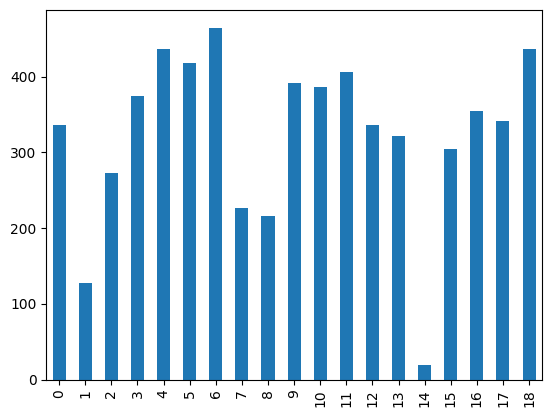

Average shifts in Granollers: 398.92857142857144


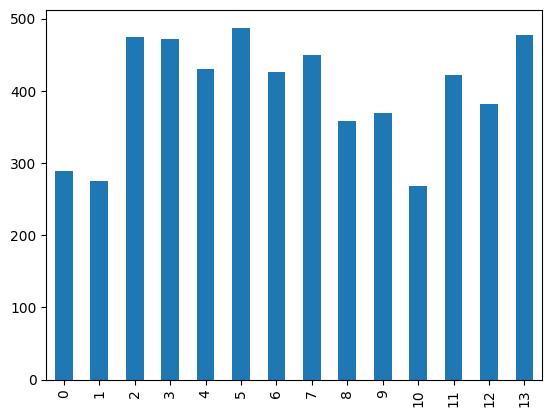

Dataset: wav2vec
Average shifts in 2021: 687.5263157894736


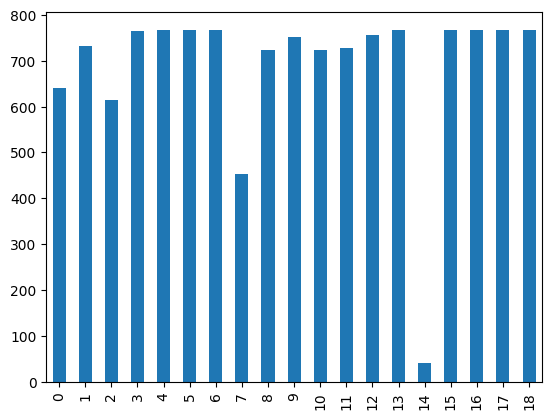

Average shifts in Granollers: 737.7142857142857


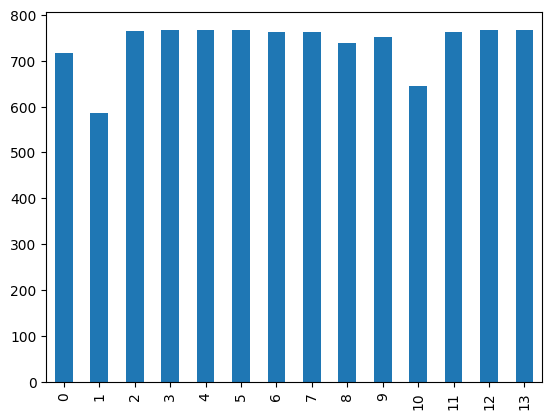

Dataset: yamnet
Average shifts in 2021: 172.31578947368422


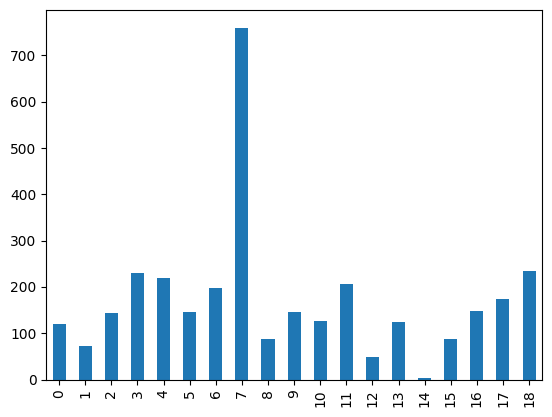

Average shifts in Granollers: 206.71428571428572


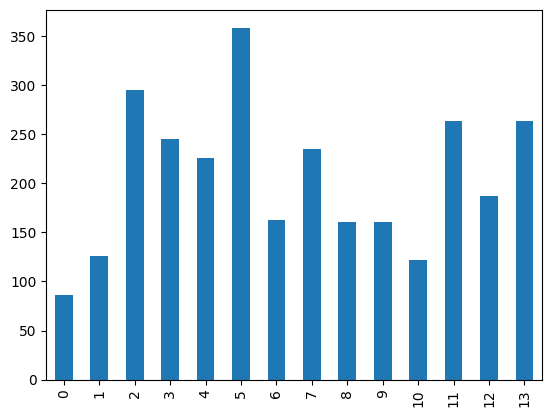

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

datasets = sorted(res.keys())
all_labels = sorted(res[datasets[0]].keys())

for dataset in datasets:
    print(f"Dataset: {dataset}")
    avg_shifts_2021 = []
    avg_shifts_granollers = []
    for label in all_labels:
        #print(50 * "-")
        #print(f"{dataset} - {label}")
        #print(50 * "-")
        n_2020 = res[dataset][label]["n_2020"]
        n_2021 = res[dataset][label]["n_2021"]
        n_granollers = res[dataset][label]["n_granollers"]
        #print(f"2020: {n_2020}, 2021: {n_2021}, Granollers: {n_granollers}")

        #print(50 * "*")
        #print("Comparison with 2020")
        try:
            for key in res[dataset][label]["2021"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["2021"]["p_values"] if el < 0.05])
                    avg_shifts_2021.append(n_shift)
                    #print(f"Shifts in 2021: {n_shift}")
                else:
                    #print(f"{key}: {res[dataset][label]['2021'][key]}")
                    pass
        except KeyError:
            pass#print("Too few values to calculate shift with 2021")

        #print(50 * "*")
        #print("Comparison with Granollers")
        try:
            for key in res[dataset][label]["granollers"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["granollers"]["p_values"] if el < 0.05])
                    avg_shifts_granollers.append(n_shift)
                    #print(f"Shifts in Granollers: {n_shift}")
                else:
                    #print(f"{key}: {res[dataset][label]['granollers'][key]}")
                    pass
        except KeyError:
            pass#print("Too few values to calculate shift with Granollers")
    
    print(f"Average shifts in 2021: {sum(avg_shifts_2021) / len(avg_shifts_2021)}")
    pd.Series(avg_shifts_2021).plot.bar()
    plt.show()
    print(f"Average shifts in Granollers: {sum(avg_shifts_granollers) / len(avg_shifts_granollers)}")
    pd.Series(avg_shifts_granollers).plot.bar()
    plt.show()

In [87]:
datasets = sorted(res.keys())
all_labels = sorted(res[datasets[0]].keys())

for dataset in datasets:
    print(f"Dataset: {dataset}")
    avg_shifts_2021 = {}
    avg_shifts_granollers = {}
    for label in all_labels:
        #print(50 * "-")
        #print(f"{dataset} - {label}")
        #print(50 * "-")
        n_2020 = res[dataset][label]["n_2020"]
        n_2021 = res[dataset][label]["n_2021"]
        n_granollers = res[dataset][label]["n_granollers"]
        #print(f"2020: {n_2020}, 2021: {n_2021}, Granollers: {n_granollers}")

        #print(50 * "*")
        #print("Comparison with 2020")
        try:
            for key in res[dataset][label]["2021"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["2021"]["p_values"] if el < 0.05])
                    avg_shifts_2021[label] = n_shift
                    #print(f"Shifts in 2021: {n_shift}")
                else:
                    #print(f"{key}: {res[dataset][label]['2021'][key]}")
                    pass
        except KeyError:
            pass#print("Too few values to calculate shift with 2021")

        #print(50 * "*")
        #print("Comparison with Granollers")
        try:
            for key in res[dataset][label]["granollers"].keys():
                if key == "p_values":
                    n_shift = len([el for el in res[dataset][label]["granollers"]["p_values"] if el < 0.05])
                    avg_shifts_granollers[label] = n_shift
                    #print(f"Shifts in Granollers: {n_shift}")
                else:
                    #print(f"{key}: {res[dataset][label]['granollers'][key]}")
                    pass
        except KeyError:
            pass#print("Too few values to calculate shift with Granollers")
    
    print("2021")
    print(sorted(avg_shifts_2021.items(), key=lambda x: x[1], reverse=True))
    print("Granollers")
    print(sorted(avg_shifts_granollers.items(), key=lambda x: x[1], reverse=True))

Dataset: openl3
2021
[('Nature/Animals/Bird', 465), ('Transport/Motorized/Road', 437), ('Industrial/Construction', 436), ('Industrial/Industry', 418), ('Signals/Bells', 406), ('Nature/Elements/Wind', 392), ('Signals/Alarm', 386), ('Human/Voice', 374), ('Things/Trolley', 355), ('Transport/Motorized', 341), ('Human/Movement', 336), ('Signals/Klaxon', 336), ('Signals/Siren', 322), ('Things/Movement', 304), ('Human/Music', 273), ('Nature/Animals/Cat', 227), ('Nature/Animals/Dog', 216), ('Human/Movement/Steps', 128), ('Things/Door', 19)]
Granollers
[('Nature/Animals/Bird', 488), ('Transport/Motorized/Road', 478), ('Human/Voice', 475), ('Industrial/Construction', 472), ('Nature/Elements/Wind', 450), ('Industrial/Industry', 431), ('Nature/Animals/Dog', 427), ('Things/Movement', 422), ('Things/Trolley', 382), ('Signals/Siren', 369), ('Signals/Klaxon', 359), ('Human/Movement/Steps', 289), ('Human/Music', 275), ('Things/Door', 268)]
Dataset: wav2vec
2021
[('Industrial/Industry', 768), ('Nature/A